# 機器學習與深度學習實作：Basic Concept of Deep Learning, part1
## 課程練習(Homework week 11)

### 姓名（Name）：陳嬿伃
### 學號（Student ID）：o902108008

## The MNIST Dataset of handwritten digits 

### Download Mnist Dataset, page 7

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [3]:
from keras.datasets import mnist
(x_train_image, y_train_label), \
(x_test_image, t_test_label) = mnist.load_data()
print('training data=', len(x_train_image))
print('test data=', len(x_test_image))

training data= 60000
test data= 10000


In [4]:
print('x_train_image',x_train_image.shape)
print('y_train_image',y_train_label.shape)

x_train_image (60000, 28, 28)
y_train_image (60000,)


### Plot Image, page 9

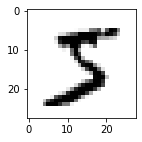

5

In [6]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap = 'binary')
    plt.show()
    
plot_image(x_train_image[0])
y_train_label[0]

### Plot Image (cont.), page 10

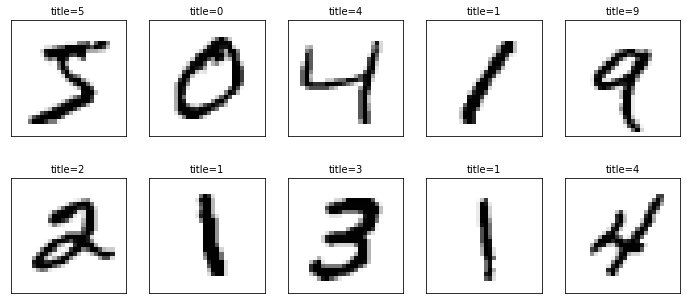

In [7]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num >25: num =25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx], cmap = 'binary')
        title = 'title=' + str(labels[idx])
        if len(prediction) >0:
            title+=',predict=' + str(prediction[idx])
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()
    
plot_images_labels_prediction(x_train_image, y_train_label, [], 0,10   )

### Plot Image (cont.), page 11

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


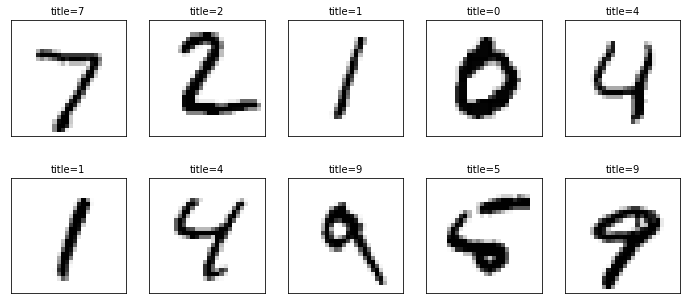

In [8]:
print("x_test_image:", x_test_image.shape)
print("y_test_label:", y_test_label.shape)
plot_images_labels_prediction(x_test_image, y_test_label, [], 0, 10)

### Preprocessing - Reshape, page 12

In [9]:
x_Train = x_train_image.reshape(60000, (28*28)).astype("float32")
x_Test = x_test_image.reshape(10000, (28*28)).astype("float32")
print(x_Train.shape)
print(x_Test.shape)

(60000, 784)
(10000, 784)


### Preprocessing - Reshape, page 13

In [10]:
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
x_train_image[0]
x_Train_normalized = x_Train / 255
x_Test_normalized = x_Test / 255
x_Train_normalized[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Preprocessing – One-hot encoding, page 14

In [12]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### MLP for Handwritten Digits Recognition using Keras (cont.), page 16 

In [14]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units = 256, input_dim = 784, kernel_initializer="normal", activation = "relu"))
model.add(Dense(units = 10, kernel_initializer="normal", activation = "softmax"))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


### Training, page 17

In [15]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

train_history = model.fit(x=x_Train_normalized,
                         y=y_TrainOneHot,
                         validation_split = 0.2,
                         epochs = 10, batch_size = 200, verbose = 2)
#verbose 0:只輸出最後結果、1:輸出部分結果、2:把過程全部輸出

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4380 - accuracy: 0.8829 - val_loss: 0.2180 - val_accuracy: 0.9408
Epoch 2/10
 - 1s - loss: 0.1907 - accuracy: 0.9455 - val_loss: 0.1556 - val_accuracy: 0.9555
Epoch 3/10
 - 1s - loss: 0.1354 - accuracy: 0.9616 - val_loss: 0.1258 - val_accuracy: 0.9649
Epoch 4/10
 - 1s - loss: 0.1027 - accuracy: 0.9701 - val_loss: 0.1117 - val_accuracy: 0.9681
Epoch 5/10
 - 1s - loss: 0.0810 - accuracy: 0.9772 - val_loss: 0.0983 - val_accuracy: 0.9718
Epoch 6/10
 - 1s - loss: 0.0660 - accuracy: 0.9819 - val_loss: 0.0938 - val_accuracy: 0.9718
Epoch 7/10
 - 1s - loss: 0.0544 - accuracy: 0.9850 - val_loss: 0.0912 - val_accuracy: 0.9732
Epoch 8/10
 - 1s - loss: 0.0459 - accuracy: 0.9876 - val_loss: 0.0832 - val_accuracy: 0.9761
Epoch 9/10
 - 1s - loss: 0.0380 - accuracy: 0.9902 - val_loss: 0.0827 - val_accuracy: 0.9758
Epoch 10/10
 - 1s - loss: 0.0317 - accuracy: 0.9918 - val_loss: 0.0805 - val_accuracy: 0.9768


### Plot Accuracy Curve, page 18  

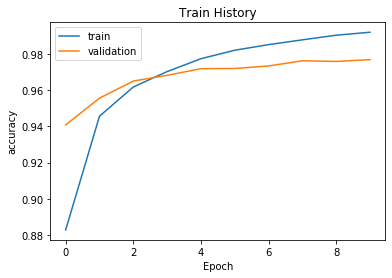

In [16]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
    
show_train_history(train_history, "accuracy", "val_accuracy")

### Plot Loss Curve, page 19 

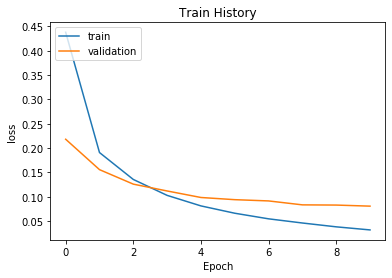

In [17]:
show_train_history(train_history, "loss", "val_loss")

### Accuracy of Test set, page 20 

In [19]:
score = model.evaluate(x_Test_normalized, y_TestOneHot)
print()
print("accuarcy = ", score[1])
#print("loss = ", score[0])

10000/10000 [==============================] - 0s 15us/step

accuarcy =  0.9764999747276306


### Show Prediction Result, page 21 

In [20]:
#錯誤分析
prediction = model.predict_classes(x_Test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

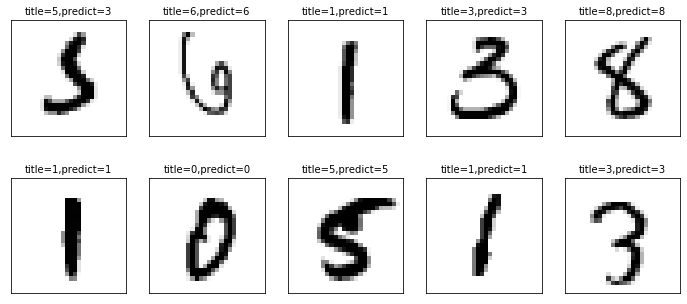

In [21]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340)
#從340筆往後輸出10筆資料

### Error Analysis – Confusion Matrix (Error Matrix), page 22

In [22]:
#用pd內建來看
import pandas as pd
pd.crosstab(y_test_label, prediction,
           rownames = ["label"], colnames = ["predict"])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1010,0,1,0,2,4,9,1
3,0,0,3,994,0,0,0,4,5,4
4,1,0,5,1,961,0,3,0,3,8
5,3,0,0,15,1,854,7,1,8,3
6,5,3,2,1,3,3,939,0,2,0
7,0,5,12,6,1,0,0,989,7,8
8,5,0,3,6,0,1,1,2,955,1


### Error Analysis - DataFrame, page 23 

In [23]:
dataframe = pd.DataFrame({"label":y_test_label, "predict":prediction})
dataframe[:2]

,label,predict
0,7,7
1,2,2


In [24]:
dataframe[(dataframe.label ==5) &(dataframe.predict ==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


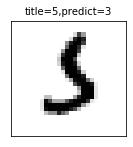

In [25]:
plot_images_labels_prediction(x_test_image, y_test_label,
                             prediction, idx=340, num=1)

### Improvement, Increase Neurons of Hidden Layer to 1000, page 24

In [26]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units = 1000, input_dim = 784, kernel_initializer="normal", activation = "relu"))
model.add(Dense(units = 10, kernel_initializer="normal", activation = "softmax"))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


### Improvement (cont.), page 25

In [27]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

train_history = model.fit(x=x_Train_normalized,
                         y=y_TrainOneHot,
                         validation_split = 0.2,
                         epochs = 10, batch_size = 200, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.2949 - accuracy: 0.9153 - val_loss: 0.1538 - val_accuracy: 0.9563
Epoch 2/10
 - 3s - loss: 0.1155 - accuracy: 0.9672 - val_loss: 0.1210 - val_accuracy: 0.9638
Epoch 3/10
 - 3s - loss: 0.0739 - accuracy: 0.9792 - val_loss: 0.0923 - val_accuracy: 0.9728
Epoch 4/10
 - 3s - loss: 0.0524 - accuracy: 0.9853 - val_loss: 0.0812 - val_accuracy: 0.9743
Epoch 5/10
 - 3s - loss: 0.0363 - accuracy: 0.9903 - val_loss: 0.0826 - val_accuracy: 0.9751
Epoch 6/10
 - 3s - loss: 0.0250 - accuracy: 0.9939 - val_loss: 0.0751 - val_accuracy: 0.9777
Epoch 7/10
 - 3s - loss: 0.0187 - accuracy: 0.9955 - val_loss: 0.0733 - val_accuracy: 0.9773
Epoch 8/10
 - 3s - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.0745 - val_accuracy: 0.9787
Epoch 9/10
 - 3s - loss: 0.0099 - accuracy: 0.9984 - val_loss: 0.0722 - val_accuracy: 0.9797
Epoch 10/10
 - 3s - loss: 0.0069 - accuracy: 0.9990 - val_loss: 0.0801 - val_accuracy: 0.9778


### Improvement (cont.), page 26
#### plot Neurons of H1: 1000 training history:acc and loss

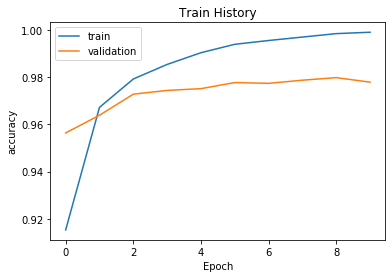

In [28]:
show_train_history(train_history, "accuracy", "val_accuracy")

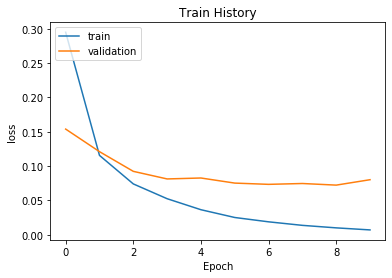

In [29]:
show_train_history(train_history, "loss", "val_loss")

### Improvement (cont.), page 27 

In [30]:
score = model.evaluate(x_Test_normalized, y_TestOneHot)
print()
print("accuarcy = ", score[1])
#print("loss = ", score[0])
###原本是0.976，變成隱藏層改成1000後為0.980，準確度提升

10000/10000 [==============================] - 0s 43us/step

accuarcy =  0.9799000024795532


### Use DropOut to prevent Overfitting, page 28 

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()
model.add(Dense(units = 1000, input_dim = 784, kernel_initializer="normal", activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 10, kernel_initializer="normal", activation = "softmax"))
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


### Use DropOut to prevent Overfitting (cont.), page 29

In [39]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

train_history = model.fit(x=x_Train_normalized,
                         y=y_TrainOneHot,
                         validation_split = 0.2,
                         epochs = 10, batch_size = 200, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.3553 - accuracy: 0.8945 - val_loss: 0.1612 - val_accuracy: 0.9546
Epoch 2/10
 - 4s - loss: 0.1585 - accuracy: 0.9537 - val_loss: 0.1204 - val_accuracy: 0.9650
Epoch 3/10
 - 3s - loss: 0.1149 - accuracy: 0.9655 - val_loss: 0.0999 - val_accuracy: 0.9707
Epoch 4/10
 - 4s - loss: 0.0916 - accuracy: 0.9727 - val_loss: 0.0911 - val_accuracy: 0.9724
Epoch 5/10
 - 4s - loss: 0.0768 - accuracy: 0.9770 - val_loss: 0.0815 - val_accuracy: 0.9749
Epoch 6/10
 - 4s - loss: 0.0636 - accuracy: 0.9808 - val_loss: 0.0758 - val_accuracy: 0.9768
Epoch 7/10
 - 4s - loss: 0.0557 - accuracy: 0.9831 - val_loss: 0.0754 - val_accuracy: 0.9779
Epoch 8/10
 - 3s - loss: 0.0466 - accuracy: 0.9857 - val_loss: 0.0728 - val_accuracy: 0.9787
Epoch 9/10
 - 4s - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0682 - val_accuracy: 0.9797
Epoch 10/10
 - 4s - loss: 0.0361 - accuracy: 0.9888 - val_loss: 0.0667 - val_accuracy: 0.9801


### Use DropOut to prevent Overfitting (cont.), page 30
#### plot 2 ACC training history, without dropout and dropout

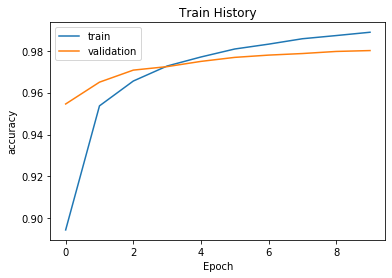

In [40]:
# dropout: train_history (accuracy)
show_train_history(train_history, "accuracy", "val_accuracy")

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()
model.add(Dense(units = 1000, input_dim = 784, kernel_initializer="normal", activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(units = 10, kernel_initializer="normal", activation = "softmax"))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

train_history = model.fit(x=x_Train_normalized,
                         y=y_TrainOneHot,
                         validation_split = 0.2,
                         epochs = 10, batch_size = 200, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.2952 - accuracy: 0.9159 - val_loss: 0.1524 - val_accuracy: 0.9567
Epoch 2/10
 - 3s - loss: 0.1165 - accuracy: 0.9668 - val_loss: 0.1174 - val_accuracy: 0.9649
Epoch 3/10
 - 3s - loss: 0.0752 - accuracy: 0.9788 - val_loss: 0.0951 - val_accuracy: 0.9720
Epoch 4/10
 - 3s - loss: 0.0524 - accuracy: 0.9855 - val_loss: 0.0827 - val_accuracy: 0.9748
Epoch 5/10
 - 3s - loss: 0.0360 - accuracy: 0.9903 - val_loss: 0.0789 - val_accuracy: 0.9763
Epoch 6/10
 - 3s - loss: 0.0261 - accuracy: 0.9935 - val_loss: 0.0739 - val_accuracy: 0.9774
Epoch 7/10
 - 3s - loss: 0.0183 - accuracy: 0.9960 - val_loss: 0.0700 - val_accuracy: 0.9799
Epoch 8/10
 - 3s - loss: 0.0128 - accuracy: 0.9974 - val_loss: 0.0759 - val_accuracy: 0.9790
Epoch 9/10
 - 3s - loss: 0.0098 - accuracy: 0.9985 - val_loss: 0.0744 - val_accuracy: 0.9793
Epoch 10/10
 - 3s - loss: 0.0078 - accuracy: 0.9988 - val_loss: 0.0779 - val_accuracy: 0.9785


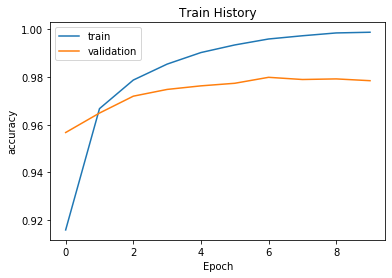

In [36]:
#without dropout: train_history (accuracy)
show_train_history(train_history, "accuracy", "val_accuracy")

### Add One More Hidden Layer, page 31

In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()
model.add(Dense(units = 1000, input_dim = 784, kernel_initializer="normal", activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1000, input_dim = 784, kernel_initializer="normal", activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 10, kernel_initializer="normal", activation = "softmax"))
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

train_history = model.fit(x=x_Train_normalized,
                         y=y_TrainOneHot,
                         validation_split = 0.2,
                         epochs = 10, batch_size = 200, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 8s - loss: 0.3678 - accuracy: 0.8839 - val_loss: 0.1402 - val_accuracy: 0.9576
Epoch 2/10
 - 7s - loss: 0.1650 - accuracy: 0.9494 - val_loss: 0.1031 - val_accuracy: 0.9679
Epoch 3/10
 - 7s - loss: 0.1181 - accuracy: 0.9636 - val_loss: 0.0898 - val_accuracy: 0.9728
Epoch 4/10
 - 8s - loss: 0.0993 - accuracy: 0.9690 - val_loss: 0.0814 - val_accuracy: 0.9759
Epoch 5/10
 - 8s - loss: 0.0846 - accuracy: 0.9735 - val_loss: 0.0832 - val_accuracy: 0.9750
Epoch 6/10
 - 8s - loss: 0.0739 - accuracy: 0.9765 - val_loss: 0.0821 - val_accuracy: 0.9754
Epoch 7/10
 - 8s - loss: 0.0685 - accuracy: 0.9775 - val_loss: 0.0833 - val_accuracy: 0.9763
Epoch 8/10
 - 8s - loss: 0.0606 - accuracy: 0.9799 - val_loss: 0.0737 - val_accuracy: 0.9785
Epoch 9/10
 - 8s - loss: 0.0556 - accuracy: 0.9824 - val_loss: 0.0740 - val_accuracy: 0.9798
Epoch 10/10
 - 8s - loss: 0.0524 - accuracy: 0.9827 - val_loss: 0.0782 - val_accuracy: 0.9793


### Add One More Hidden Layer (cont.), page 32

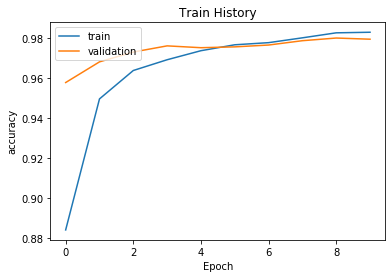

In [50]:
show_train_history(train_history, "accuracy", "val_accuracy")

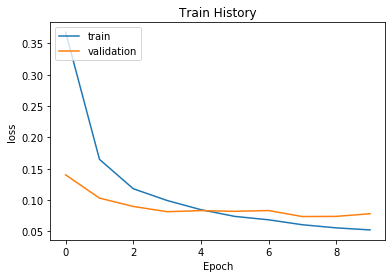

In [51]:
show_train_history(train_history, "loss", "val_loss")

In [52]:
score = model.evaluate(x_Test_normalized, y_TestOneHot)
print()
print("accuarcy = ", score[1])

10000/10000 [==============================] - 1s 84us/step

accuarcy =  0.982200026512146


In [53]:
prediction = model.predict_classes(x_Test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

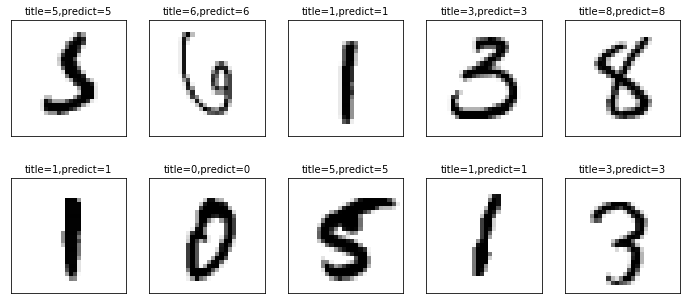

In [54]:
plot_images_labels_prediction(x_test_image, y_test_label,
                             prediction, idx=340)
###原本預測錯的變成對的了~~~